In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import division, I think I had an issue running this with python 2. This makes divide sign work properly
#I have upgraded to python 3, but this is still run as python 2.Let me know if this causes an issue for you.
from __future__ import division

In [37]:
#import the unkwown wine file, as well as the wine dataset from sklearn
infile = 'unknown_wine.csv'
unknownwine = pd.read_csv(infile,sep=(','))
from sklearn.datasets import load_wine
wine = load_wine()
wine.target
targetnamelist = list(wine.target_names)
targetnamelist

['class_0', 'class_1', 'class_2']

In [38]:
# Feature matrix in a object named X
X = wine.data
# response vector in a object named y
y = wine.target
#print the shape of X and Y
print(np.shape(X))
print(np.shape(y))

(178, 13)
(178,)


In [39]:
#import the splitter (train/test) and the scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
#Scale the data to normalise
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
#check the shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [41]:
#import classifier
from sklearn.neural_network import MLPClassifier

#import metrics model to check the accuracy 
from sklearn import metrics

#initialize lists, goodfit saves node, layer count and accuracy, goodfitMATRIX saves the confusion matrix for
#those that have accuracy above 0.9
#results saves the nodes/layers/score for all models
#layers is fed to the classifier, and is changed during each for and while loop
goodfit = []
goodfitMATRIX = []
results = []
layers = []
count_layer = 1
first =0
rstate_nr = 1
for x in range(5):
    while count_layer <6:
        #append to the layer list ex. [1],[1,1]... then as x increases
        #ex. [2],[2,2]...
        layers.append(x+1)
        mlp = MLPClassifier(hidden_layer_sizes=layers[count_layer-1],max_iter=10000,random_state=rstate_nr)
        mlp.fit(X_train,y_train)
        predictions = mlp.predict(X_test)
        accresults = metrics.accuracy_score(y_test,predictions)
        res = [x+1,count_layer,accresults,rstate_nr]
        confmat = metrics.confusion_matrix(y_test, predictions)
        if accresults >= 0.9:
            goodfit.append(res)
            goodfitMATRIX.append(confmat)
            #Because while testing I've seen that several are perfect fits
            #I'm adding an if statement to test the first perfect fit I get on the unknown data        
            Tp = confmat[1,1]
            Fp = confmat[1,2]
            Fn = confmat[2,1]
            Tn = confmat[2,2]
            Precision = Tp / np.add(Tp,Fp)
            Recall = Tp / np.add(Tp,Fn)
            Accuracy = np.add(Tp,Tn) / (Tp+Fp+Fn+Tn)
            Fmeasure = (2*Recall*Precision) / np.add(Recall,Precision)
            if Precision ==1 and Recall ==1 and Accuracy==1 and Fmeasure==1 and first ==0:
                unkprediction = mlp.predict(unknownwine)
                classprediction = []
                bestfit = res[0:2]
                for i in unkprediction:
                    tname = targetnamelist[i]
                    classprediction.append(tname)
                prob = mlp.predict_proba(unknownwine)
                first =1
        results.append(res)
        count_layer = count_layer+1
        rstate_nr = rstate_nr+1
    count_layer = 1
    layers = []
#print results
results

[[1, 1, 0.8888888888888888, 1],
 [1, 2, 0.8888888888888888, 2],
 [1, 3, 0.6111111111111112, 3],
 [1, 4, 0.8888888888888888, 4],
 [1, 5, 0.3611111111111111, 5],
 [2, 1, 1.0, 6],
 [2, 2, 0.9722222222222222, 7],
 [2, 3, 0.9166666666666666, 8],
 [2, 4, 0.9722222222222222, 9],
 [2, 5, 0.9444444444444444, 10],
 [3, 1, 0.9722222222222222, 11],
 [3, 2, 0.9722222222222222, 12],
 [3, 3, 0.9444444444444444, 13],
 [3, 4, 1.0, 14],
 [3, 5, 0.9722222222222222, 15],
 [4, 1, 0.9722222222222222, 16],
 [4, 2, 1.0, 17],
 [4, 3, 0.9444444444444444, 18],
 [4, 4, 0.9722222222222222, 19],
 [4, 5, 0.9722222222222222, 20],
 [5, 1, 0.9722222222222222, 21],
 [5, 2, 1.0, 22],
 [5, 3, 1.0, 23],
 [5, 4, 1.0, 24],
 [5, 5, 0.9722222222222222, 25]]

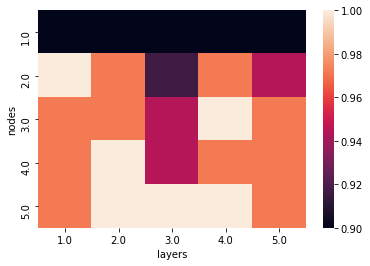

In [42]:
#make results list into an array for plotting
myarray = np.asarray(results)

#make a dataframe with each column named for ploting
data = pd.DataFrame({'nodes': myarray[:,0], 'layers': myarray[:,1], 'Z': myarray[:,2]})
data_pivoted = data.pivot("nodes", "layers", "Z")
#vmin,vmax changed just to show mainly the ones above 0.9
ax = sns.heatmap(data_pivoted,vmin=0.9, vmax=1)
plt.show()

This heat map shows which models had the best accuracy. I have the z variable (accuracy) plotted from 0.9-1.0. So any that are not black were found to be above 0.9 accuracy score. 
As seen above all models showed a high accuracy score above 0.9 if the nodes used were above 1. The lighter the color the better accuracy.
If you see in my for loop above, I put in an if statement that if I happen to have a model that is a perfect fit, which I had seen occur while testing different things. So I happened to know that there were perfect models. However, the code below still prints the best fit models if there aren't and models that have a perfect fit.

I chose the first instance of a perfect model to test on the unknownwine data set, because I assume that the lowest node/layer model that is a perfect fit will be faster and more efficient than any models that are also perfect but have more nodes/layers.

#####Describe the implications of your results for model performance for each target class and choose which layers/neurons you will use in the final version of your model.#####


In [44]:
#for each model that has accuracy above 0.9, calculate the precision, recall, accuracy, Fmeasure, and print
#if there was a perfect fit then skip this step ex. first =1
if first == 0:
    count = 0
    for i in goodfitMATRIX:
        print goodfit[count]
        confmat = i
        Tp = confmat[1,1]
        Fp = confmat[1,2]
        Fn = confmat[2,1]
        Tn = confmat[2,2]
        Precision = Tp / np.add(Tp,Fp)
        Recall = Tp / np.add(Tp,Fn)
        Accuracy = np.add(Tp,Tn) / (Tp+Fp+Fn+Tn)
        Fmeasure = (2*Recall*Precision) / np.add(Recall,Precision)
        print ('Precision = %s, Recall =  %s, Accuracy =  %s, F-mes = %s' % (Precision,Recall,Accuracy,Fmeasure))
        count = count+1
else:
    print ('Nodes used %s, and layers used %s in best fit model' % (bestfit[0],bestfit[1]))
    print classprediction
    print prob



Nodes used 2, and layers used 1 in best fit model
['class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_2', 'class_0', 'class_0']
[[1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 9.23125049e-238]
 [1.00000000e+000 0.00000000e+000 3.45178196e-153]
 [1.00000000e+000 5.34371771e-277 9.75519919e-093]
 [1.00000000e+000 0.00000000e+000 3.73125518e-131]
 [1.00000000e+000 7.57430851e-148 1.40435092e-043]
 [1.00000000e+000 0.00000000e+000 5.50351480e-110]
 [1.11945166e-009 3.96531250e-107 9.99999999e-001]
 [1.00000000e+000 2.00854940e-312 6.79710476e-083]
 [1.00000000e+000 1.28671354e-225 1.23673441e-074]]


In [19]:
#use best model to train data and return accuracy
#this is done by hand if there was no perfect fit

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000,random_state=42)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
accresults = metrics.accuracy_score(y_test,predictions)
accresults

0.8888888888888888

Find a scikit-learn function that will give the probability that each unknown wine fits into 
each of one of the three target classes. List the probabilities for each unknown sample 
for each target class and comment on your results. 